In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
data = pd.read_csv('mnist_train.csv')

In [69]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [71]:
# def init_params():
#     W1 = np.random.rand(10,784)
#     b1 = np.random.rand(10, 1)
    
#     W2 = np.random.rand(10,10)
#     b2 = np.random.rand(10, 1)
    
#     return W1, b1, W2, b2

# def ReLU(Z):
#     return np.maximum(0,Z)

# def softmax(Z):
#     return np.exp(Z)/np.sum(np.exp(Z))

# def forward_prop(W1,b1,W2,b2,X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
    
#     return Z1, A1, Z2, A2

# def one_hot(Y):
#     one_hot_Y = np.zeros(Y.size, Y.max() + 1)
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

# def deriv_ReLU(Z):
#     return Z > 0
    
# def back_prop(Z1, A1, Z2, A2, W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1/m*dZ2.dot(A1.T)
#     db2 = 1/m+np.sum(dZ2, 2)
#     dZ1 = W1.T.dot(dZ2) * deriv_ReLU(Z1)
#     dW1 = 1/m*dZ1.dot(X.T)
#     db1 = 1/m+np.sum(dZ1, 2)
    
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = d1 - alpha * db1
    
#     W2 = W2 - alpha * dW2
#     b2 = d2 - alpha * db2
    
#     return W1, b1, W2, b2

In [72]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [73]:
# def get_accuracy(predictions, Y):
#     print(predictions, Y)
#     return np.sum(predictions == Y)/Y.size

# def get_predictions(A2):
#     return np.argmax(A2, 0)

# def gradient_descent(X, Y, iterations, alpha):
#     W1, b1, W2, b2 = init_params()
    
#     for i in range(iterations):
#         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#         dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
#         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dB2, db2, alpha)
#         if i % 50 == 0:
#             print("Iterations : ", i)
#             print("Accuracy : ", get_Accuracy(get_predictions(A2), Y))
    
#     return W1, b1, W2, b2

In [74]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [75]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[2 2 9 ... 2 2 2] [9 3 4 ... 1 6 2]
0.10676271186440678
Iteration:  10
[2 3 3 ... 2 6 9] [9 3 4 ... 1 6 2]
0.17908474576271186
Iteration:  20
[2 3 3 ... 2 6 2] [9 3 4 ... 1 6 2]
0.2288135593220339
Iteration:  30
[2 3 3 ... 2 6 2] [9 3 4 ... 1 6 2]
0.2711016949152542
Iteration:  40
[2 3 9 ... 2 6 2] [9 3 4 ... 1 6 2]
0.3230677966101695
Iteration:  50
[2 3 9 ... 2 6 2] [9 3 4 ... 1 6 2]
0.37233898305084745
Iteration:  60
[2 3 9 ... 2 6 2] [9 3 4 ... 1 6 2]
0.4352372881355932
Iteration:  70
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.49474576271186443
Iteration:  80
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.5332881355932203
Iteration:  90
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.5634067796610169
Iteration:  100
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.5888135593220339
Iteration:  110
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.6133389830508474
Iteration:  120
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.6329322033898305
Iteration:  130
[7 3 9 ... 1 6 2] [9 3 4 ... 1 6 2]
0.6507457627118645
Iteration:  1

In [76]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


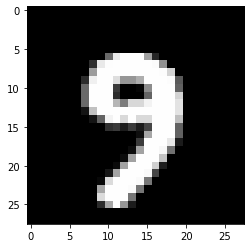

Prediction:  [3]
Label:  3


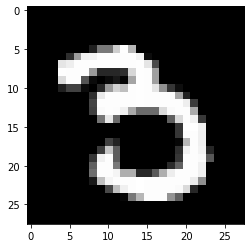

Prediction:  [2]
Label:  4


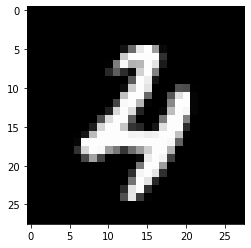

Prediction:  [0]
Label:  0


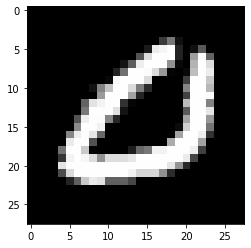

In [77]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [78]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 6 7 4 7 8 2 1 3 6 6 6 1 1 4 1 0 8 6 0 8 0 7 5 5 3 5 0 5 8 9 8 7 0 9 4 9
 3 3 3 0 8 1 3 1 6 3 7 4 7 4 3 4 0 6 0 2 6 7 8 4 2 5 9 7 1 8 4 7 6 3 8 9 2
 0 1 8 9 5 6 6 7 4 7 3 0 1 3 4 2 4 8 3 7 7 0 6 5 5 4 2 7 8 0 4 0 5 0 4 8 4
 0 4 9 5 3 8 2 3 7 0 3 0 6 3 0 2 1 9 8 1 5 8 2 6 9 2 6 2 4 5 6 1 4 2 9 7 5
 6 2 7 0 9 3 9 8 8 1 3 5 9 6 2 6 7 9 0 8 0 4 6 8 5 2 1 0 3 0 9 1 2 5 8 3 3
 5 8 1 4 5 8 5 1 2 0 7 1 4 4 8 2 5 6 4 6 1 3 8 1 6 5 7 7 0 1 0 8 6 2 5 7 2
 0 8 6 6 4 4 4 7 9 2 5 6 3 9 3 0 7 5 8 1 2 9 7 0 4 2 1 5 5 6 1 9 6 5 6 3 9
 6 1 2 2 5 0 9 9 1 9 1 0 5 3 9 1 9 6 0 7 5 2 0 3 9 5 6 1 3 0 0 1 7 3 8 5 0
 6 3 5 0 0 8 9 7 5 8 7 9 6 0 9 2 4 6 4 1 1 1 8 4 2 9 8 5 2 5 3 4 2 1 2 5 9
 8 1 6 4 9 3 1 3 0 8 3 0 5 0 7 2 0 1 3 1 2 8 3 1 2 9 6 2 6 6 7 5 7 9 3 1 6
 8 2 9 2 9 9 5 2 2 1 0 3 1 6 9 9 5 9 8 6 8 2 6 4 6 3 8 6 1 9 5 3 4 1 7 7 8
 8 7 6 4 8 3 4 7 6 6 3 6 0 2 0 0 7 0 9 5 4 1 0 7 1 4 2 5 6 0 8 6 0 1 0 6 2
 6 2 9 2 1 0 2 7 7 1 9 4 9 0 1 3 3 1 4 8 9 3 1 0 3 2 2 9 6 2 7 0 2 9 1 7 9
 9 4 8 6 5 2 9 3 8 6 4 0 

0.862